ПОДГОТОВКА

In [7]:
from sympy import *
from sympy.plotting import plot, plot3d, PlotGrid
init_printing()
from IPython.display import display, Math

x, h, t, dt = symbols("x,h,t, tau")

u = Function('u')(x, t)

def series(m, n):
  return u + n*dt*diff(u, t) + m*h*diff(u, x) + Rational('1/2') *(n*dt)**2*diff(u, t,t) +\
                Rational('1/2')*(m*h)**2*diff(u, x,x) + (n*dt)*(m*h)*diff(u, x, t) +\
                Rational('1/6')*(
                (n*dt)**3*diff(u, t,t,t) + (m*h)**3*diff(u, x,x,x) + 3*(m*h)*(n*dt)**2*diff(u, x,t,t) + 3*(m*h)**2*(n*dt)*diff(u, x,x,t)
                )

a, b, c, d = symbols(r"\alpha_{-1}^0, \alpha_{0}^0, \alpha_{-2}^{-1}, \alpha_{0}^{-1}")

taylored = series(0,1) - a*series(-1,0) - b*series(0,0) - c*series(-2,-1) - d*series(0,-1)

l = symbols(r"\lambda")

simp = simplify(taylored.doit().subs({
    diff(u,t) : -l*diff(u,x),

    diff(u,t,t) : l*l*diff(u,x,x),
    diff(u,x,t) : -l*diff(u,x,x),

    diff(u,t,t,t) : -l*l*l*diff(u,x,x,x),
    diff(u,x,t,t) :  l*l*diff(u,x,x,x),
    diff(u,x,x,t) : -l*diff(u,x,x,x),
}))

In [8]:
sigma = symbols(r"\sigma")
e0 = simp.expand().coeff(u).subs({h:l*dt/sigma})
e1 = (simp/h).expand().coeff(diff(u,x)).subs({h:l*dt/sigma})
e2 = (simp/h/h).expand().coeff(diff(u,x,x)).subs({h:l*dt/sigma})
e3 = (simp/h/h/h).expand().coeff(diff(u,x,x,x)).subs({h:l*dt/sigma})

(1T) ДВУХПАРАМЕТРИЧЕСКОЕ МНОЖЕСТВО

Двухпараметрическое множество:


'Прямые, вместе с осями ограничивающие положительные схемы:'

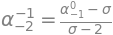

In [9]:
b_solved = solve([e0, e1], [b,d])[b]
d_solved = solve([e0, e1], [b,d])[d]

print('Двухпараметрическое множество:')
display(
        Eq(b, b_solved), Eq(d, d_solved),
        'Прямые, вместе с осями ограничивающие положительные схемы:',
        Eq(c, solve([d_solved], [c])[c]), 
           Eq(c, solve([b_solved], [c])[c]),
)

(2T) ОДНОПАРАМЕТРИЧЕСКОЕ МНОЖЕСТВО

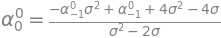

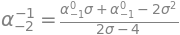

'C данной сигмой:'

In [10]:
b_solved = solve([e0, e1, e2], [b,c,d])[b]
d_solved = solve([e0, e1, e2], [b,c,d])[d]
c_solved = solve([e0, e1, e2], [b,c,d])[c]
display(Eq(b, b_solved), Eq(d, d_solved), Eq(c, c_solved), 'C данной сигмой:',
        Eq(b, b_solved.subs({sigma:Rational(1/2)})), Eq(d, d_solved.subs({sigma:Rational(1/2)})), Eq(c, c_solved.subs({sigma:Rational(1/2)})))

(3T) ЕДИНСТВЕННАЯ СХЕМА

In [11]:
display(solve([e0, e1, e2,e3], [a,b,c,d]), 
    'С данной сигмой',
    Eq(a, solve([e0, e1, e2,e3], [a,b,c,d])[a].subs({sigma:Rational(1/2)})),
    Eq(b, solve([e0, e1, e2,e3], [a,b,c,d])[b].subs({sigma:Rational(1/2)})),
    Eq(c, solve([e0, e1, e2,e3], [a,b,c,d])[c].subs({sigma:Rational(1/2)})),
    Eq(d, solve([e0, e1, e2,e3], [a,b,c,d])[d].subs({sigma:Rational(1/2)})),
    )

'С данной сигмой'

(4T) с минимальной «аппроксимационной вязкостью»

In [12]:
par = symbols("a")
e2p = (e2-par).subs(solve([e0, e1], [b,d]))
solve([e2p], [par])

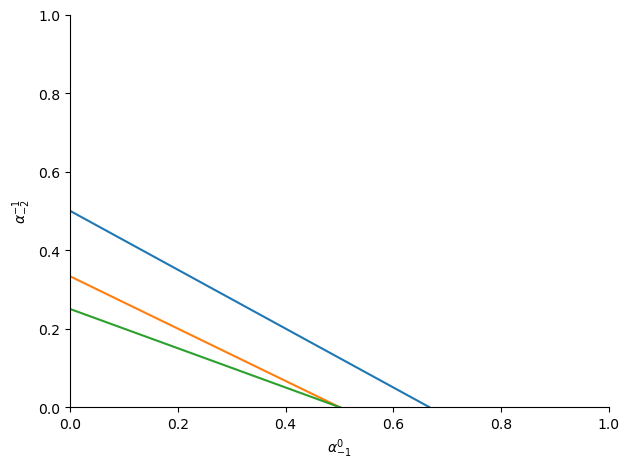

In [13]:
b_solved = solve([e0, e1], [b,d])[b]
d_solved = solve([e0, e1], [b,d])[d]



display(Eq(par, solve([e2p.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a]})], [par])[par]))
plot(
    solve([b_solved], [c])[c].subs({sigma:1/2}), 
    solve([d_solved], [c])[c].subs({sigma:1/2}),
    solve([e2p], [c])[c].subs({par:solve([e2p.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})})], [par])[par]}).subs({sigma:1/2}),
    xlim=(0,1), ylim=(0,1), ylabel=c
    )

In [14]:
display(
        Eq(b, b_solved.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})})),
        Eq(d, d_solved.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})})),
        Eq(c, 0),
        Eq(a, solve([solve([d_solved], [c])[c]], [a])[a]),
        'C данной сигмой:',
        Eq(b, b_solved.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})}).subs({sigma:1/2})),
        Eq(d, d_solved.subs({c:0, a:solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})}).subs({sigma:1/2})),
        Eq(c, 0),
        Eq(a, solve([solve([d_solved], [c])[c]], [a])[a].subs({sigma:Rational(1/2)})),
        )

'C данной сигмой:'

(5T) наиболее близкая ко множеству положительных по Фридрихсу схем

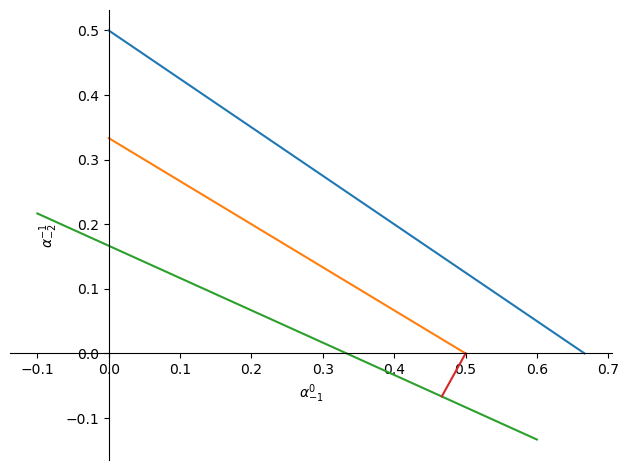

In [15]:
b_solved = solve([e0, e1], [b,d])[b]
d_solved = solve([e0, e1], [b,d])[d]
c_solved = solve([e0, e1, e2], [b,c,d])[c]


offset = symbols("b")
nearest_point_x = .5
k = -1/c_solved.expand().collect(a).coeff(a)
offset = solve([k*nearest_point_x + offset], offset)[offset]

nearest_a = solve([c_solved - k*a - offset], [a])[a]

plot(
    (solve([b_solved], [c])[c].subs({sigma:Rational(1/2)}), (a, 0, Rational(2/3))),
    (solve([d_solved], [c])[c].subs({sigma:Rational(1/2)}), (a, 0, Rational(1/2))),
    (c_solved.subs({sigma:Rational(1/2)}), (a, -.1, 0.6)),
    ((k*a+offset).subs({sigma:Rational(1/2)}), (a, nearest_a.subs({sigma:Rational(1/2)}), 0.5)),
    ylabel=c, xlabel=a
)

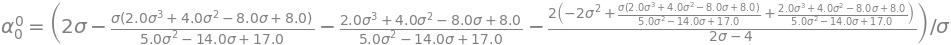

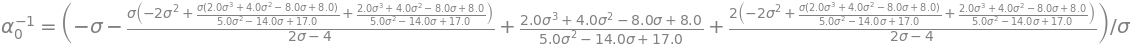

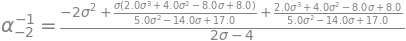

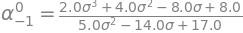

In [16]:
nearest_c = c_solved.subs({a:nearest_a})
display(
        Eq(b, b_solved.subs({c:nearest_c, a:nearest_a})),
        Eq(d, d_solved.subs({c:nearest_c, a:nearest_a})),
        Eq(c, nearest_c),
        Eq(a, nearest_a)
)

In [17]:
display(
        Eq(b, b_solved.subs({c:nearest_c, a:nearest_a}).subs({sigma:Rational('1/2')})),
        Eq(d, d_solved.subs({c:nearest_c, a:nearest_a}).subs({sigma:Rational('1/2')})),
        Eq(c, nearest_c.subs({sigma:Rational('1/2')})),
        Eq(a, nearest_a.subs({sigma:Rational('1/2')}))
)

(6T)

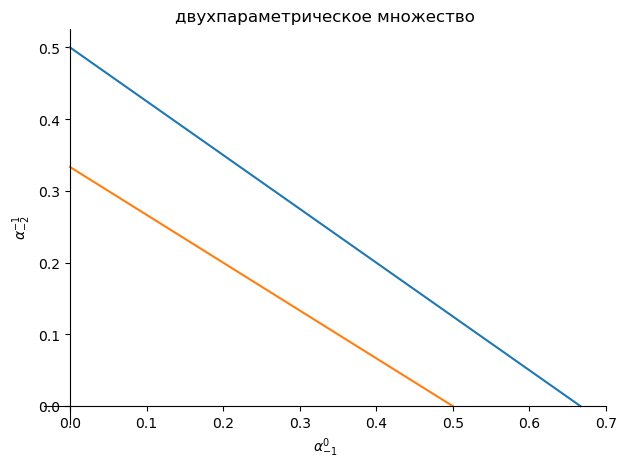

In [18]:
b_solved = solve([e0, e1], [b,d])[b].subs({sigma:Rational(1/2)})
d_solved = solve([e0, e1], [b,d])[d].subs({sigma:Rational(1/2)})

plot(
    (solve([b_solved], [c])[c], (a, 0, Rational(2/3))),
    (solve([d_solved], [c])[c], (a, 0, Rational(1/2))),
    ylabel=c, xlabel=a, title='двухпараметрическое множество'
)

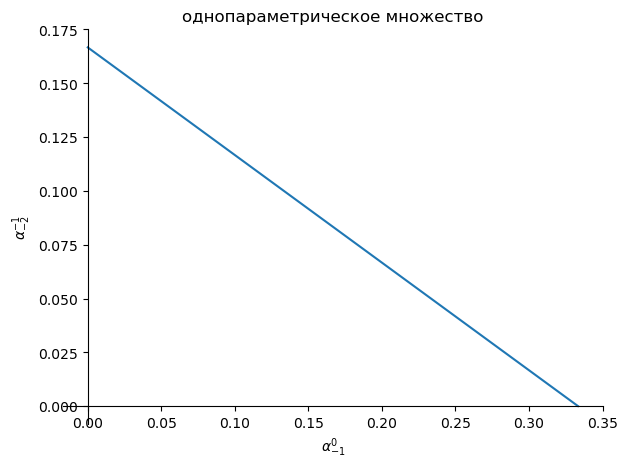

In [19]:
c_solved = solve([e0, e1, e2], [b,c,d])[c]
display(Eq(c, c_solved.subs({sigma:Rational(1/2)})))

p1 = plot(
    (c_solved.subs({sigma:Rational(1/2)}), (a, 0, Rational(1/3))),
    ylabel=c, xlabel=a, title='однопараметрическое множество', show=False
)

p1.show()